In [3]:
!pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.8/162.8 kB 27.3 MB/s eta 0:00:00
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 28.0 MB/s eta 0:00:00
  DEPRECATION: kaggle is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for kaggle ... done


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import opendatasets as od
from PIL import Image

from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
# plt.rcParams['figure.figsize'] = [20, 5]

In [6]:
od.download('https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors', './data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Your Kaggle Key:Downloading rockpaperscissors.zip to ./data/rockpaperscissors


100%|██████████| 306M/306M [00:10<00:00, 29.8MB/s] 


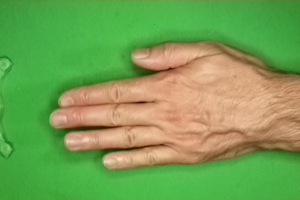

In [12]:
image = Image.open('data/rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png')
image

In [15]:
image_raw = np.array(image)

### Data preparation for KNN

### Training KNN model

### Results